In [8]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

sns.set(style='whitegrid')
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))

folder_path = 'texts/'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Данила\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Данила\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
if not os.path.exists(folder_path):
    print(f"Ошибка: Путь {folder_path} не существует. Убедитесь, что указана правильная директория.")
else:
    file_list = glob.glob(os.path.join(folder_path, '*.txt'))
    if len(file_list) == 0:
        print(f"Ошибка: В папке {folder_path} нет текстовых файлов.")
    else:
        documents = []
        for file_path in file_list:
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                documents.append(content)
        print(f'Загружено {len(documents)} документов.')


Загружено 200 документов.


In [10]:
def preprocess_text(text):
    text = text.lower()  # Приведение текста к нижнему регистру
    text = re.sub(r'http\S+|www.\S+', '', text)  # Удаление ссылок
    text = re.sub(r'[^а-яА-Яa-zA-Z0-9\s]', '', text)  # Удаление спецсимволов
    tokens = word_tokenize(text, language='russian')  # Токенизация
    tokens = [word for word in tokens if word not in stop_words]  # Удаление стоп-слов
    return ' '.join(tokens)

if len(documents) > 0:
    processed_documents = [preprocess_text(doc) for doc in documents]
    print(f'Предобработанные документы: {len(processed_documents)}')
else:
    print("Ошибка: Нет документов для предобработки.")


Предобработанные документы: 200


In [11]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
if len(processed_documents) > 0:
    embeddings = model.encode(processed_documents)
    if len(embeddings) == 0:
        print("Ошибка: эмбеддинги не были созданы. Проверьте предобработку и наличие текстов.")
    else:
        print(f'Размерность эмбеддингов: {embeddings.shape}')
else:
    print("Ошибка: Нет предобработанных документов для создания эмбеддингов.")


C:\Anaconda\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Размерность эмбеддингов: (200, 512)


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

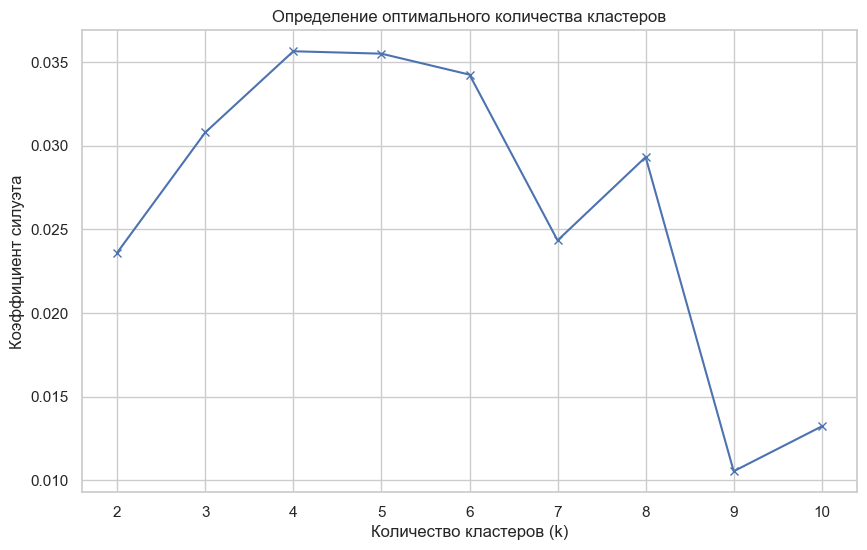

Оптимальное количество кластеров: 4


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
if len(embeddings) > 0:
    range_n_clusters = list(range(2, 11))
    silhouette_avg = []

    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(embeddings)
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(embeddings, cluster_labels))

    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_avg, 'bx-')
    plt.xlabel('Количество кластеров (k)')
    plt.ylabel('Коэффициент силуэта')
    plt.title('Определение оптимального количества кластеров')
    plt.show()

    optimal_clusters = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
    print(f'Оптимальное количество кластеров: {optimal_clusters}')

    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(embeddings)
    labels = kmeans.labels_
    df_documents = pd.DataFrame({'document': documents, 'cluster': labels})
else:
    print("Ошибка: Нет эмбеддингов для выполнения кластеризации.")


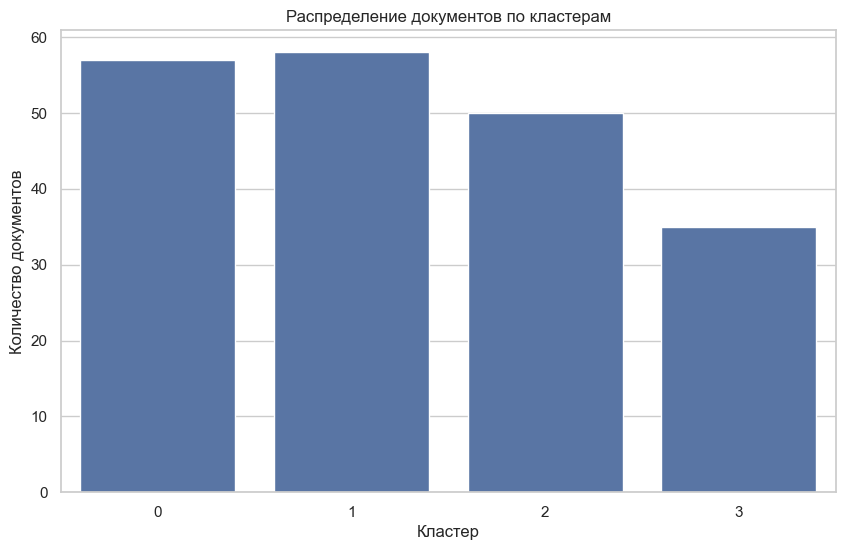


Кластер 0:
Документ 1:
Topic: Technology ; Fans Throng for First Crack at New Game  #39;Halo 2 #39;

Text: Technology News, LOS ANGELES - It takes a special kind of person to stay up all night and stand in a line nearly 250...

Документ 2:
Topic: UPDATE 2-Blockbuster cuts online price, challenges Netflix

Text: Video chain Blockbuster Inc (BBI.N: Quote, Profile, Research) on Friday said it would lower the price of its online DVD rentals...


Кластер 1:
Документ 1:
Topic: Spotlight shines on quarterbacks

Text: They couldn't be more different. One is the prototype quarterback, seemingly built using the create-a-player function from a video game, standing tall in...

Документ 2:
Topic: Yankees Seek to Keep Pitcher Jon Lieber (AP)

Text: AP - After watching their starting pitchers struggle for much of the season, the New York Yankees would like to bring Jon Lieber back for 200...


Кластер 2:
Документ 1:
Topic: Ottawa Says Time to Stop Protecting Air Canada

Text: The Canadian government

In [13]:
if len(embeddings) > 0 and 'df_documents' in locals():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='cluster', data=df_documents)
    plt.title('Распределение документов по кластерам')
    plt.xlabel('Кластер')
    plt.ylabel('Количество документов')
    plt.show()

    for cluster_num in range(optimal_clusters):
        print(f'\nКластер {cluster_num}:')
        cluster_docs = df_documents[df_documents['cluster'] == cluster_num]['document']
        for i, doc in enumerate(cluster_docs.head(2)):
            print(f'Документ {i + 1}:\n{doc[:200]}...\n')
else:
    print("Ошибка: Нет данных для анализа распределения по кластерам.")


In [14]:
def classify_new_document(new_doc):
    processed_doc = preprocess_text(new_doc)
    embedding = model.encode([processed_doc])
    embedding = embedding.reshape(1, -1)  # Преобразование в двумерный массив
    cluster_label = kmeans.predict(embedding)[0]
    return cluster_label

if 'kmeans' in locals():
    new_document = "Пример нового текста для классификации. Он содержит информацию о данных и аналитике."
    predicted_cluster = classify_new_document(new_document)
    print(f'Новый документ отнесен к кластеру: {predicted_cluster}')
else:
    print("Ошибка: Модель кластеризации не обучена. Классификация невозможна.")


Новый документ отнесен к кластеру: 0


In [15]:
# Просмотр документов в кластере 0
cluster_0_docs = df_documents[df_documents['cluster'] == 0]['document']
for i, doc in enumerate(cluster_0_docs.head(5)):  # Просмотр первых 5 документов в кластере 0
    print(f'Документ {i + 1}:\n{doc[:200]}...\n')


Документ 1:
Topic: Technology ; Fans Throng for First Crack at New Game  #39;Halo 2 #39;

Text: Technology News, LOS ANGELES - It takes a special kind of person to stay up all night and stand in a line nearly 250...

Документ 2:
Topic: UPDATE 2-Blockbuster cuts online price, challenges Netflix

Text: Video chain Blockbuster Inc (BBI.N: Quote, Profile, Research) on Friday said it would lower the price of its online DVD rentals...

Документ 3:
Topic: Learning to Search for Life on Mars with the Atacama Rover

Text: Ames Research Center -- A dedicated team of scientists is spending the next four weeks in northern Chile's Atacama Desert. They...

Документ 4:
Topic: PeopleSoft Denies Execs Visited Oracle (Reuters)

Text: Reuters - PeopleSoft Inc.  on Tuesday\denied an analyst report that its executives recently met with\Oracle Corp. , the rival software ve...

Документ 5:
Topic: HP cues iPod

Text: Hewlett-Packard brands its own version of Apple's music player and introduces a line of consu